# GNSS Jamming detection

Global Navigation Satellite System (GNSS) has become a critical part of hour society. It is vital for personal navigation, air and marine traffic, logistics, farming, and many other applications. It also provide precise timing for smart power grids, banking sector, etc. 

During recent years, GNSS Jamming (blocking) and spoofing (fake GNSS data) have become serious problems. The picture from [GPS Jam](https://gpsjam.org/) web site, shows the real time jamming situation in 17th of October 2024. 

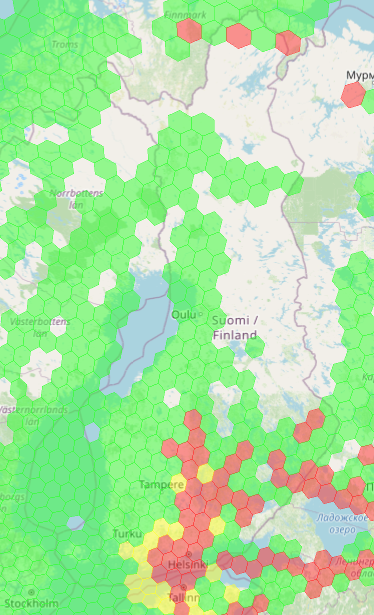

## Jamming detection
One step forward to protect from GNSS jamming, is to detect it. It is difficult to get controlled data about jamming, because GNSS jamming is illegal, and cannot be done in the field. There is, however, one place in Europe, where GNSS jamming and spoofing can be made during speficic campaings. We participated this year in the [Jammertest2024](https://jammertest.no/jammertest/) event in Bleik, Norway, and collected a lot of data with different equipment. 

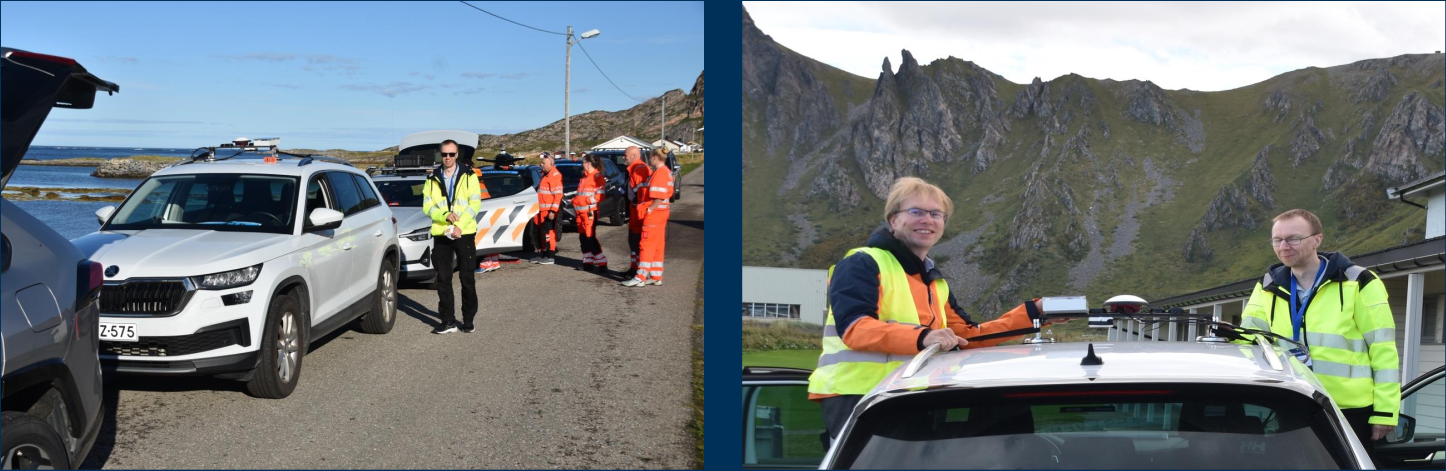

The Grey box, which I am touching with my left hand, contains a Google pixel phone, which is one of the devices we used for collecting data.

## The data

We collected the data using a [GNSS-logger application](https://play.google.com/store/apps/details?id=com.google.android.apps.location.gps.gnsslogger&hl=en&pli=1) in the phone. The data contains the following sensor data:

- GNSS measuremet data in National Marine Electronics Association's (NMEA) data format
- Raw GNSS observations in Receiver Independent Exchange Format (RINEX)
- Accelerometer, Gyroscope and magnetometer observations
- We collected also odometer data from the car using OBD-reader. It contains distance and velocity information. The resolution of the distance is only 100 m

## The experiment2
 - Filename MP1_2024-09-10T1421 (UTC +2)
 - Samples: 1371
 - Time = 2024-09-10 12:21:49 - 12:44:40 (UTC)
   
Jammer was located at Stave (69.21244, 15.85825). The phone collecting the data was Google Pixel, with Android 14, attached in the roof of our car. We drowe back and forth between the Stave community house, where the jammer was and the turning point few hundred meters away. 

### Experiment 1
 - cigaret lighter jammer
 - 2024-09-10 12:15 UTC ---

### Experiment 2
 - jammer on, multi antenna
 - 2024-09-10 12:30:30 UTC ---
 - jammer located in the same place as previous


## The task

Use the provdided data and develop a method to detect jamming. 

Instructions:
- It is probably easiest to start with `nmea.csv`, which contains timestamp, latitude and longitude. These values are extracted from `GPGGA` messages from `gnss_log_2024_09_10_14_21_50.nmea`.
   - Additional information: The most commong NMEA messages are explained in 
[What Exactly Is GPS NMEA Data?](https://www.gpsworld.com/what-exactly-is-gps-nmea-data/)
- The satellite observations before any processing, are stored in Rinex file `gnss_log_2024_09_10_14_21_50.nmea`
   - The full RINEX specification is [here](https://files.igs.org/pub/data/format/rinex305.pdf?_gl=1*3fgn2n*_ga*MTkyOTM0NjYzMi4xNzI5MDA1MjE0*_ga_Z5RH7R682C*MTcyOTE5OTI5MS4yLjAuMTcyOTE5OTI5OC41My4wLjA.&_ga=2.185390953.157231000.1729199293-1929346632.1729005214)
   - For example, the [RTKlib](https://github.com/tomojitakasu/RTKLIB)-program can read the RINEX file and calculate the receiver position based on that. The `gnss_log_2024_09_10_14_21_50.pos` -file contains this pre-calculated position information, calculated only on raw satellite measurements
   - The `.pos` -file contains also much more information than only the position.
   - A lot of more information about RTKlib and position are in the  [RTKlib explorer blog](https://rtklibexplorer.wordpress.com/)
- The car odometer data in files `odometer_2024-09-10T1407.log` and `odometer_2024-09-10T1429.log` can be also useful, since it is free from spoofing or jamming

Furher tips:
- The positioning data is best to be visualized in a map. The [IPY-Leaflet](https://ipyleaflet.readthedocs.io/en/latest/) widget is really handy for visualizing positioning data in the map.


### The POS file desrcription

Field | Purpose 
----- | -------
GPST  | Timestamp                
latitude(deg)  | Latitude
longitude(deg)  | Longitude
height(m)    | Height
Q   | Quality factor
ns  | Number of satellites available for positioning
sdn(m)   | Standard deviation in Norh-South direction
sde(m)   | Standard deviation in East-West direction
sdu(m)   | Standard deviation in Up-direction
sdne(m)  | Standard deviation in North-East, horizontal plane
sdeu(m)  | Standard deviation in East-Up plane
sdun(m)  | Standard devaition in Up-North plane
age(s)   | Age of data
ratio    | ?


## Some tips

The GNSS receivers adjust the gain of the receiver according to the GNSS signal strength. Abnormal signal strength can be an indicator of jamming. The receiver's Automated Gain Control (AGC) readings has been sometimes used for jammer detection. They could be usefull together with the signal strength indication in RINEX files (*.24o). 

The NMEA-data is phone's own opinion of it's location. It has been achieved by some unknown algorithm of the phone manufacturer. These black box algorithms have only a limited value for research.

### Plotting paths in the map

It is much easier to explore the coordinate data when it can be plot in the map. The IpyLeaflet is a very easy to use map widget, which allows easy way to visualize geospatial data.

Lets read some data from the file and visualize that in the map. The default basemap is OpenStreet map, but there are also others. See the documentation of [IpyLeaflet](https://ipyleaflet.readthedocs.io/en/latest/). 

In [1]:
import pandas as pd
import ipyleaflet

nmeadata = pd.read_csv('data/nmea.csv', nrows=100)
nmeadata

,timestamp,lat,lon,height
0,2024-09-10T122149,69.212358,15.858570,8.0
1,2024-09-10T122150,69.212365,15.858571,10.2
2,2024-09-10T122151,69.212375,15.858584,11.8
3,2024-09-10T122152,69.212369,15.858604,11.9
4,2024-09-10T122154,69.212368,15.858616,11.9
...,...,...,...,...
95,2024-09-10T122325,69.212369,15.858315,8.5
96,2024-09-10T122326,69.212391,15.858258,8.3
97,2024-09-10T122327,69.212426,15.858206,8.1
98,2024-09-10T122328,69.212474,15.858150,7.5


Lets visualize the sample geospatial data as a path in the map.

In [2]:
stave=(69.21230, 15.85849)
map = ipyleaflet.Map(center=stave, zoom=18)
map.add(ipyleaflet.Marker(location=stave))
path=nmeadata.iloc[:,1:3].values.tolist()
map.add(ipyleaflet.AntPath(locations=path,delay=1000))
map

Map(center=[69.2123, 15.85849], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'z…

### Using road information from Open Street maps

The road information from the Open Streetmaps can be also very usefull for navigation. It can be fetched from the Internet using [osmnx](https://osmnx.readthedocs.io/en/stable/) library. The result is a geospatial graph, which is using [networkx](https://networkx.org/documentation/stable/index.html) library for graph operations.

In [3]:
import networkx as nx
import osmnx as ox

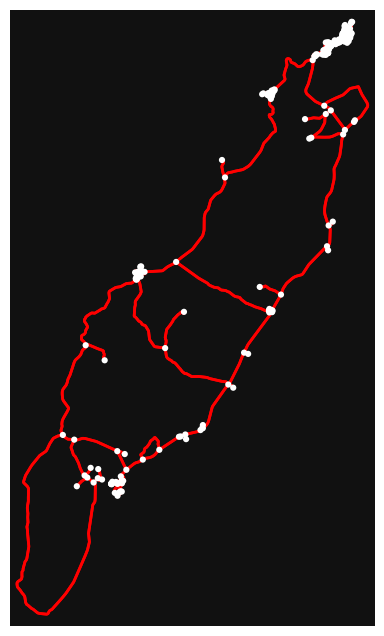

In [4]:
# Fetch the roads around Andøya, from Open Streemaps as a graph, and plot it
G_andoya = ox.graph_from_place("Andoya, Norway", network_type="drive")
fig, ax = ox.plot_graph(G_andoya, edge_color='red', edge_linewidth=2, node_size=20)

In [33]:
# Setup the coordinates of some locations
bleik=69.275800025,15.967875687
stave=69.21230, 15.85849
nordmela=69.136405, 15.676996

# Impute missing edge speeds and calculate edge travel times with the speed module, if you need them
#G_v = ox.routing.add_edge_speeds(G_andoya)
#G_t = ox.routing.add_edge_travel_times(G_v)

# get the nearest network nodes to two lat/lng points with the distance module
orig = ox.distance.nearest_nodes(G_andoya, X=nordmela[1], Y=nordmela[0])
dest = ox.distance.nearest_nodes(G_andoya, X=stave[1], Y=stave[0])

route = ox.shortest_path(G_andoya, orig, dest, weight="length")
display(route)

[5351705230,
 5351706058,
 5351705076,
 5351705057,
 5351706082,
 1593174043,
 5351796473]

In [34]:
# Convert route to Geopandas data frame and show it

gdf=ox.routing.route_to_gdf(G_andoya, route)
gdf

,,,osmid,ref,name,highway,maxspeed,oneway,reversed,length,geometry,bridge
u,v,key,,,,,,,,,,
5351705230,5351706058,0,178004111,7702,Nordmelaveien,secondary,50,False,True,127.546,"LINESTRING (15.67681 69.13654, 15.67689 69.136...",NaN
5351706058,5351705076,0,178004111,7702,Nordmelaveien,secondary,50,False,True,71.157,"LINESTRING (15.67994 69.13636, 15.68116 69.136...",NaN
5351705076,5351705057,0,178004111,7702,Nordmelaveien,secondary,50,False,True,66.408,"LINESTRING (15.68174 69.13636, 15.68342 69.13639)",NaN
5351705057,5351706082,0,"[110276713, 178004111]",7702,Nordmelaveien,secondary,"[80, 50]",False,"[False, True]",304.484,"LINESTRING (15.68342 69.13639, 15.68627 69.136...",NaN
5351706082,1593174043,0,"[110276713, 110276731, 1058046071]",7702,"[Nordmelaveien, Nordelv bru]",secondary,80,False,"[False, True]",2893.960,"LINESTRING (15.69109 69.13654, 15.69894 69.136...",yes
1593174043,5351796473,0,"[146221696, 110301191, 554569928, 554569927, 1...",7702,"[Skogvoll, Stavedalsveien]",secondary,"[60, 80]",False,"[False, True]",8743.603,"LINESTRING (15.75843 69.14408, 15.75926 69.144...",yes


In [35]:
# Plot the route in the map
gdf.explore()